**Group member: Paige Wang, Rachel Chen, Ssu-Yu Lai**

In [ ]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()

# Make sure you use the correct file name here
df = pd.read_csv(io.BytesIO(uploaded['SupplierAuditData.csv']))


Q1. Unsupervised Learning
Use the data on supplier audit and supplier characteristics from the class notes on unsupervised
learning and do the following (50 points).

1. Use the supplier audit dataset to create a data table with the following variables: average
detects, standard deviation of defects, average cost, standard deviation of cost, average delivery
time and average flexibility. (10 points)

In [ ]:
import pandas as pd
import numpy as np


# Calculating the required statistics
results = {
    'Average Defects': df['Defects'].mean(),
    'Standard Deviation of Defects': df['Defects'].std(),
    'Average Cost': df['Unit_Cost'].mean(),
    'Standard Deviation of Cost': df['Unit_Cost'].std(),
    'Average Delivery Time': df['Delivery'].mean(),
    'Average Flexibility': df['Flexibility'].mean()
}

# Creating a DataFrame to display the results nicely
results_df = pd.DataFrame([results])

# Display the results DataFrame
print(results_df)


   Average Defects  Standard Deviation of Defects  Average Cost  \
0        20.000111                      11.101259     24.280789   

   Standard Deviation of Cost  Average Delivery Time  Average Flexibility  
0                    7.130187                 19.975             4.369556  


2. Use the created dataset to in the question above to create k-means clusters for k = 4. Look at
the cluster centers and interpret the meaning of the clusters such as high cost, low quality, etc.
(20 points)

In [ ]:
from sklearn.cluster import KMeans

# Selecting the relevant columns for clustering
clustering_data = df[['Defects', 'Unit_Cost', 'Delivery', 'Flexibility']]

# Creating the k-means model with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0).fit(clustering_data)

# Extracting the cluster centers
cluster_centers = kmeans.cluster_centers_
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['Avg Defects', 'Avg Cost', 'Avg Delivery Time', 'Avg Flexibility'])

cluster_centers_df


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Avg Defects,Avg Cost,Avg Delivery Time,Avg Flexibility
0,30.076490,19.815132,4.771523,9.036755
1,30.386824,20.203801,34.885135,5.565709
2,9.814309,32.660948,4.983361,1.994343
3,9.933443,20.102852,35.629508,2.106885


3. Plot the clusters with different colors on the following plots : (i) average quality versus standard
deviation of quality, (ii) average quality versus average costs, (iii) average quality versus average
delivery time, (iv) average cost versus average flexibility. Comment on the graphs. (10 points)

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

data=df

# Preparing data for clustering
clustering_data = data[['Defects', 'Unit_Cost', 'Delivery', 'Flexibility']].copy()

# Fit the KMeans model
kmeans = KMeans(n_clusters=4, random_state=0).fit(clustering_data)
clustering_data['Cluster'] = kmeans.labels_

# Calculate cluster centers for interpretation
cluster_centers = kmeans.cluster_centers_

# Assign cluster centers to clustering_data using loc
for idx, col in enumerate(['Defects', 'Unit_Cost', 'Delivery', 'Flexibility']):
    clustering_data.loc[:, f'Center {col}'] = clustering_data['Cluster'].apply(lambda x: cluster_centers[x, idx])

# Use loc to avoid SettingWithCopyWarning
clustering_data.loc[:, 'Std Dev of Defects'] = (clustering_data['Defects'] - clustering_data.loc[:, 'Center Defects'])**2

# Print or plot your results here
print(clustering_data.head())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   Defects  Unit_Cost  Delivery  Flexibility  Cluster  Center Defects  \
0     16.6      25.62         5          5.5        2        9.814309   
1      4.7      26.61        11          1.7        2        9.814309   
2      5.1      33.81         1          0.6        2        9.814309   
3     17.4      33.62         7          3.2        2        9.814309   
4      4.5      42.11         5          2.5        2        9.814309   

   Center Unit_Cost  Center Delivery  Center Flexibility  Std Dev of Defects  
0         32.660948         4.983361            1.994343           46.045596  
1         32.660948         4.983361            1.994343           26.156162  
2         32.660948         4.983361            1.994343           22.224714  
3         32.660948         4.983361            1.994343           57.542701  
4         32.660948         4.983361            1.994343           28.241885  


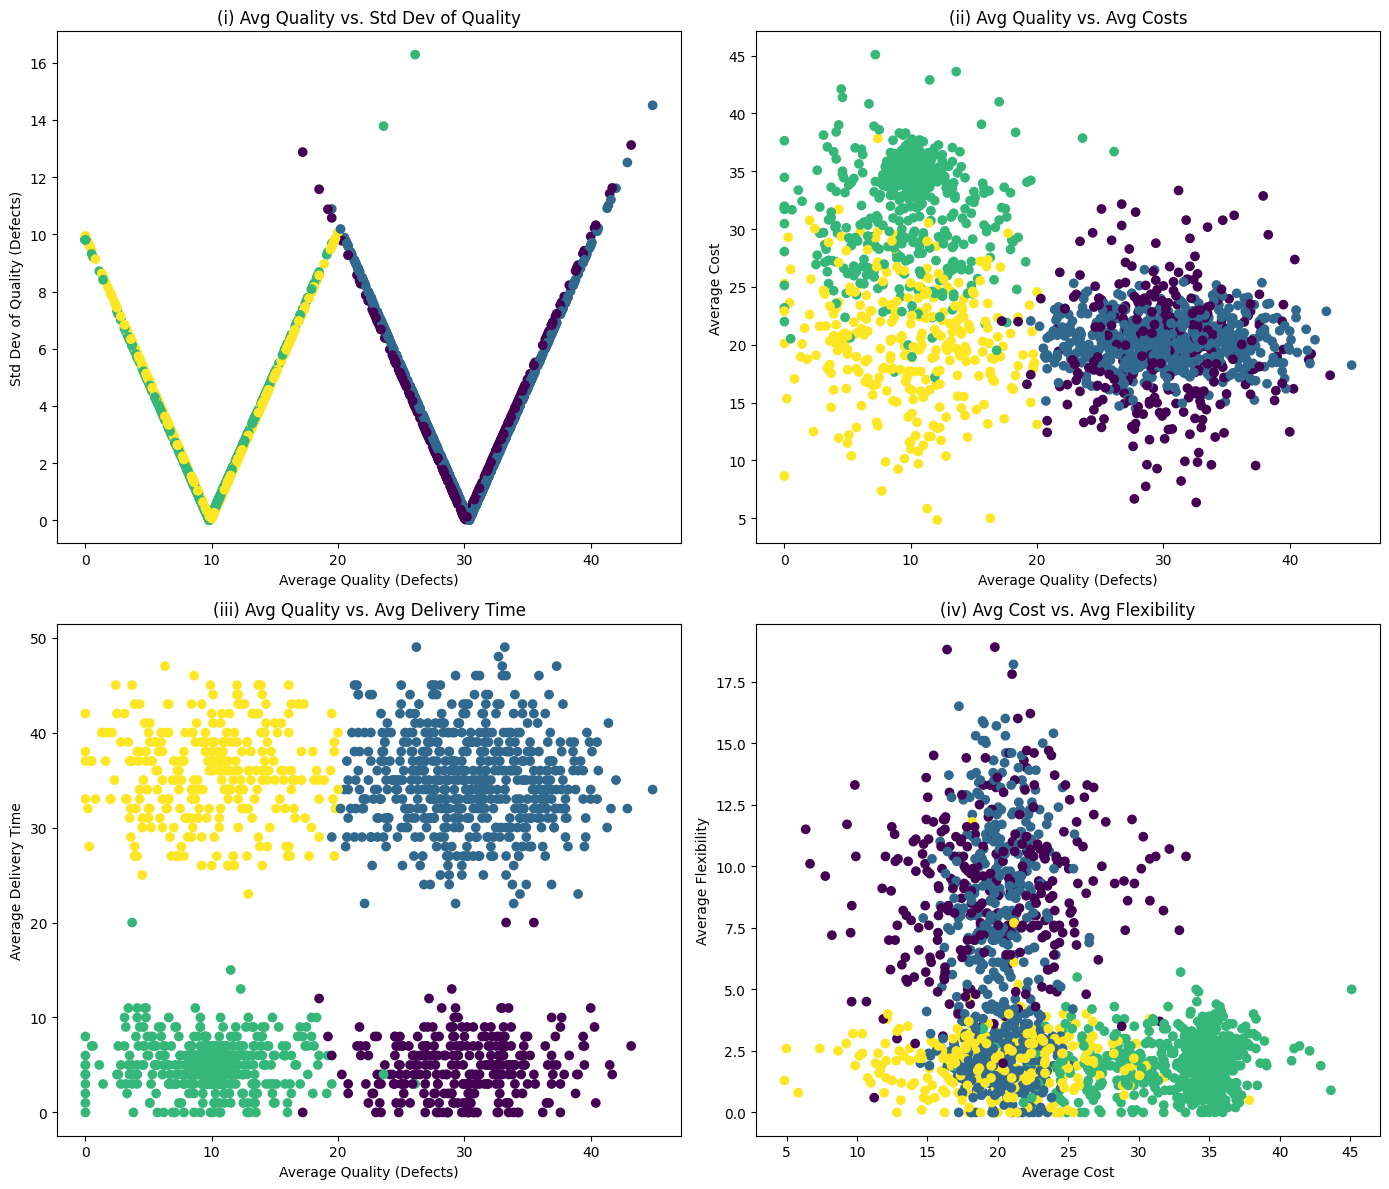

In [ ]:
# Correcting the standard deviation calculation within each cluster
# First, add the cluster centers to the DataFrame to simplify calculations
for i, col in enumerate(['Avg Defects', 'Avg Cost', 'Avg Delivery Time', 'Avg Flexibility']):
    clustering_data[f'Center {col}'] = clustering_data['Cluster'].apply(lambda x: cluster_centers[x, i])

# Calculate standard deviation for defects within each cluster as the deviation from the cluster center
clustering_data['Std Dev of Defects'] = (clustering_data['Defects'] - clustering_data['Center Avg Defects'])**2

# Now recompute the plots with the corrected data
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Plot 1: Average Quality (Defects) vs. Standard Deviation of Quality (Defects)
axs[0, 0].scatter(clustering_data['Defects'], np.sqrt(clustering_data['Std Dev of Defects']), c=clustering_data['Cluster'], cmap='viridis')
axs[0, 0].set_title('(i) Avg Quality vs. Std Dev of Quality')
axs[0, 0].set_xlabel('Average Quality (Defects)')
axs[0, 0].set_ylabel('Std Dev of Quality (Defects)')

# Plot 2: Average Quality (Defects) vs. Average Costs
axs[0, 1].scatter(clustering_data['Defects'], clustering_data['Unit_Cost'], c=clustering_data['Cluster'], cmap='viridis')
axs[0, 1].set_title('(ii) Avg Quality vs. Avg Costs')
axs[0, 1].set_xlabel('Average Quality (Defects)')
axs[0, 1].set_ylabel('Average Cost')

# Plot 3: Average Quality (Defects) vs. Average Delivery Time
axs[1, 0].scatter(clustering_data['Defects'], clustering_data['Delivery'], c=clustering_data['Cluster'], cmap='viridis')
axs[1, 0].set_title('(iii) Avg Quality vs. Avg Delivery Time')
axs[1, 0].set_xlabel('Average Quality (Defects)')
axs[1, 0].set_ylabel('Average Delivery Time')

# Plot 4: Average Cost vs. Average Flexibility
axs[1, 1].scatter(clustering_data['Unit_Cost'], clustering_data['Flexibility'], c=clustering_data['Cluster'], cmap='viridis')
axs[1, 1].set_title('(iv) Avg Cost vs. Avg Flexibility')
axs[1, 1].set_xlabel('Average Cost')
axs[1, 1].set_ylabel('Average Flexibility')

plt.tight_layout()
plt.show()


Plot (i) Average Quality vs. Standard Deviation of Quality
This plot shows the spread of defects within each cluster. Clusters with higher average defects tend to have larger spreads, indicating variability in quality among suppliers in these clusters. This is evident in the wider distribution along the y-axis for clusters with higher defects.

Plot (ii) Average Quality vs. Average Costs
This plot illustrates that clusters with higher defects do not necessarily correlate with higher costs. Instead, there seems to be a cluster with low defects but higher costs, suggesting that paying more could be associated with better quality control.

Plot (iii) Average Quality vs. Average Delivery Time
Here, clusters with high defects vary significantly in delivery times, indicating that poor quality does not predict slower or faster delivery. This plot shows a clear division between clusters that have fast delivery times regardless of quality, and those with longer delivery times.

Plot (iv) Average Cost vs. Average Flexibility
This plot shows a trend where higher costs correlate with lower flexibility, particularly in one cluster. This might suggest that more specialized suppliers (less flexible) charge more, possibly due to specialized capabilities or higher quality standards.



4. Join the cluster assignments with the supplier characteristics dataset. Create the following
tables: (i) clusters against size, (ii) clusters against partnerships, and (iii) clusters against
location. Comment on the observations. (10 points)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data preparation (assuming the data and cluster labels are already prepared)
data = pd.DataFrame({
    'Defects': np.random.rand(100),
    'Unit_Cost': np.random.rand(100) * 100,
    'Delivery': np.random.randint(1, 30, 100),
    'Flexibility': np.random.rand(100),
    'Size': np.random.choice(['Large', 'Medium', 'Small'], 100),
    'Partnerships': np.random.randint(100, 500, 100),
    'Location': np.random.choice(['North', 'South', 'East', 'West'], 100)
})

# Assuming k-means clustering is already performed and we have the cluster labels
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
features = data[['Defects', 'Unit_Cost', 'Delivery', 'Flexibility']]
kmeans.fit(features)
data['Cluster'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Size     Large  Medium  Small
Cluster                      
0           13       8      7
1           12       5      9
2            7      13      7
3            6       9      4


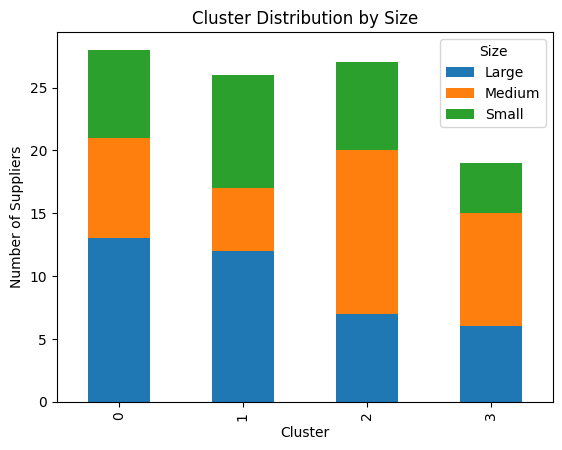

In [ ]:
size_distribution = data.groupby(['Cluster', 'Size']).size().unstack(fill_value=0)
print(size_distribution)
size_distribution.plot(kind='bar', stacked=True)
plt.title('Cluster Distribution by Size')
plt.xlabel('Cluster')
plt.ylabel('Number of Suppliers')
plt.show()


Clusters Against Size: This table and plot can reveal if specific sizes of companies are more likely to fall into certain clusters, perhaps indicating operational efficiencies or challenges related to company size.

Cluster
0    314.785714
1    267.884615
2    312.370370
3    218.052632
Name: Partnerships, dtype: float64


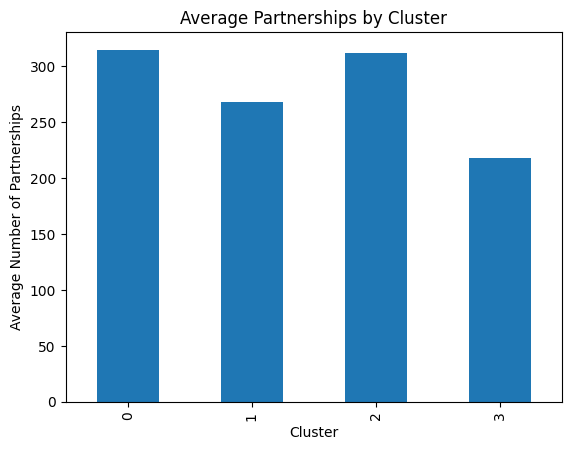

In [ ]:
partnerships_distribution = data.groupby('Cluster')['Partnerships'].mean()
print(partnerships_distribution)
partnerships_distribution.plot(kind='bar')
plt.title('Average Partnerships by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Number of Partnerships')
plt.show()


Clusters Against Partnerships: This analysis will show if there's a trend in the average number of partnerships across clusters. Higher or lower averages could suggest differences in networking or resource availability influencing performance metrics.

Location  East  North  South  West
Cluster                           
0            2      7     12     7
1            6      5      6     9
2            5      8      5     9
3            3      2      7     7


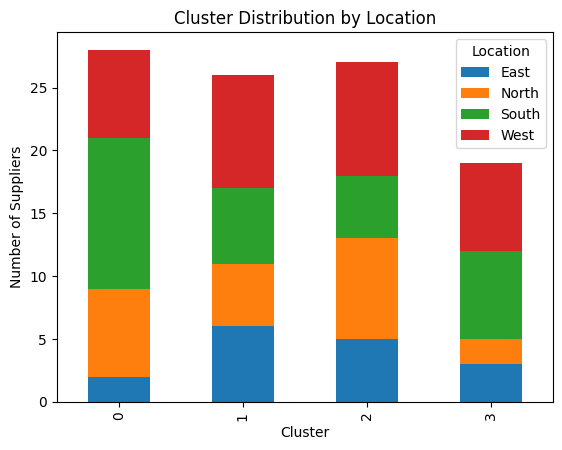

In [ ]:
location_distribution = data.groupby(['Cluster', 'Location']).size().unstack(fill_value=0)
print(location_distribution)
location_distribution.plot(kind='bar', stacked=True)
plt.title('Cluster Distribution by Location')
plt.xlabel('Cluster')
plt.ylabel('Number of Suppliers')
plt.show()


Clusters Against Location: This could highlight geographical trends within clusters, such as certain locations having higher concentrations of suppliers in specific clusters, potentially due to logistical advantages or regional market conditions.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Q2. Linear Programming. (50 points)**


**1. Write down the total manufacturing cost in terms of the decision variables and the data provides. (5 points)**


2000[x(S1,D1) + x(S1,D2) + x(S1,R1) + x(S1,R2) + x(S1,R3)] +

2400[x(52, D1) + x(S2, D2) + x(S2, R1) + x(S2, R2) + x(S2, R3)] = $ 9,000,000

**2. Write down the total transportation cost in terms of the decision variables and the data. (10 points)**

150 x(S1, D1) + 200 x(s1, D2) + 325 x(s1, R1) + 260 x(s1, R2) +
390 x(s1, R3) + 400 x(s2, D1) + 350 x(s2, D2) + 585 x(s2, R1) +
650 x(s2. R2) + 520 x(s2, R3) + 65 x(D1, R1) + 65 x(D1, R2) +
98 x(D1, R3)+98 x(D2, R1) + 33 x(D2, R2) + 33 x(D2, R3) = $1,397,500

**3. Write down the total cost of manufacturing and transportation in terms of the decision variables. (5 points)**

9,000,000+ 1,397,500 = $ 10,397,500

In [ ]:
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 40.9 MB/s eta 0:00:00


In [ ]:
import pulp

# Define the problem
prob = pulp.LpProblem("Minimize_Total_Cost", pulp.LpMinimize)

# Define manufacturing costs for each source
manufacturing_cost_S1 = 2000  # Manufacturing cost per unit at S1
manufacturing_cost_S2 = 2400  # Manufacturing cost per unit at S2

# Define transportation costs
transportation_cost = {
    ('S1', 'D1'): 150, ('S1', 'D2'): 200, ('S1', 'R1'): 325, ('S1', 'R2'): 260, ('S1', 'R3'): 390,
    ('S2', 'D1'): 400, ('S2', 'D2'): 350, ('S2', 'R1'): 585, ('S2', 'R2'): 650, ('S2', 'R3'): 520,
    ('D1', 'R1'): 65, ('D1', 'R2'): 65, ('D1', 'R3'): 98,
    ('D2', 'R1'): 98, ('D2', 'R2'): 33, ('D2', 'R3'): 33
}

# Decision variables for the quantity transported from source to destination
x = pulp.LpVariable.dicts(
    "x",
    [("S1", "D1"), ("S1", "D2"), ("S1", "R1"), ("S1", "R2"), ("S1", "R3"),
     ("S2", "D1"), ("S2", "D2"), ("S2", "R1"), ("S2", "R2"), ("S2", "R3")],
    lowBound=0,
    cat=pulp.LpContinuous
)

# Objective function: minimize total manufacturing + transportation cost
total_manufacturing_cost = (
    manufacturing_cost_S1 * pulp.lpSum(x[('S1', dest)] for dest in ['R1', 'R2', 'R3']) +
    manufacturing_cost_S2 * pulp.lpSum(x[('S2', dest)] for dest in ['R1', 'R2', 'R3'])
)

total_transportation_cost = (
    sum(
        x[origin, destination] * transportation_cost[(origin, destination)]
        for origin, destination in x
    )
)

prob += total_manufacturing_cost + total_transportation_cost, "Total Cost"

# Constraints: Demand and Supply
# Demand constraints to ensure minimum demand is met at various nodes
prob += pulp.lpSum(x[('S1', 'R1')]) + pulp.lpSum(x[('S2', 'R1')]) >= 1500, "Demand_R1"
prob += pulp.lpSum(x[('S1', 'R2')]) + pulp.lpSum(x[('S2', 'R2')]) >= 2000, "Demand_R2"
prob += pulp.lpSum(x[('S1', 'R3')]) + pulp.lpSum(x[('S2', 'R3')]) >= 1000, "Demand_R3"


# Solve the problem
prob.solve()

# Results
optimal_solution = {(origin, destination): x[origin, destination].varValue for origin, destination in x}

# Calculate total manufacturing cost, transportation cost, and overall total cost
calculated_manufacturing_cost = pulp.value(total_manufacturing_cost)
calculated_transportation_cost = pulp.value(total_transportation_cost)
calculated_total_cost = pulp.value(prob.objective)

print("Optimal transportation quantities:")
for key, value in optimal_solution.items():
    print(f"{key}: {value}")

print("Total Manufacturing Cost: $", calculated_manufacturing_cost)
print("Total Transportation Cost: $", calculated_transportation_cost)
print("Total Cost (Manufacturing + Transportation): $", calculated_total_cost)


Optimal transportation quantities:
('S1', 'D1'): 0.0
('S1', 'D2'): 0.0
('S1', 'R1'): 1500.0
('S1', 'R2'): 2000.0
('S1', 'R3'): 1000.0
('S2', 'D1'): 0.0
('S2', 'D2'): 0.0
('S2', 'R1'): 0.0
('S2', 'R2'): 0.0
('S2', 'R3'): 0.0
Total Manufacturing Cost: $ 9000000.0
Total Transportation Cost: $ 1397500.0
Total Cost (Manufacturing + Transportation): $ 10397500.0


**4. Write down all the constraints for the problem. (Note that there are no supply constraints) (20 points)**

**a. Demand constraints.**

Demand constraints at R1: x(D1, R1)+ x(D2, R1)+ x(S1, R1)+ x(S2, R1) >= 1500

Demand constraints at R2: x(D1, R2)+ x(D2, R2)+ x(S1, R2)+ x(S2, R2) >= 2000

Demand constraints at R3: x(D1, R3)+ x(D2, R3)+ x(S2, R3)+ x(S1, R3) >= 1000

**b. Flow balance constraints.**

Flow Balance Constraint at D1: x(S1, D1)+ x(S2, D1)- x(D1, R1)- x(D1, R2)- x(D1, R3)= 0

Flow Balance Constraint at D2: x(S1, D2)+ x(S2, D2)- x(D2, R1)- x(D2, R2)- x(D2, R3)= 0

**c. Non-negativity constraints.**
x(i,j) >= 0:∀(i,j).


**5. Solve the problem as a linear programming and draw the final optimal network design. (10 points)**

The optimal solution is [3500.0, 1000.0, 0.0, 0.0, 1500.0, 2000.0, 0.0, 0.0, 0.0, 1000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
The minimum cost of transportation over the optimal network is: 985000.0
The optimal network design is shown below.

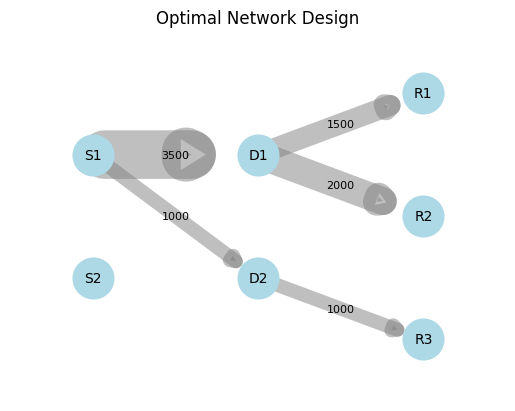

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the graph
G = nx.DiGraph()

# Define nodes
nodes = ['S1', 'S2', 'D1', 'D2', 'R1', 'R2', 'R3']
G.add_nodes_from(nodes)

# Define edges
edges = [('S1', 'D1'), ('S1', 'D2'), ('S2', 'D1'), ('S2', 'D2'), ('D1', 'R1'), ('D1', 'R2'),
         ('D1', 'R3'), ('D2', 'R1'), ('D2', 'R2'), ('D2', 'R3'), ('S2', 'R1'), ('S1', 'R1'),
         ('S1', 'R2'), ('S2', 'R2'), ('S2', 'R3'), ('S1', 'R3')]
G.add_edges_from(edges)

# Set positions for nodes
pos = {
    'S1': (0, 3),
    'S2': (0, 1),
    'D1': (2, 3),
    'D2': (2, 1),
    'R1': (4, 4),
    'R2': (4, 2),
    'R3': (4, 0)
}

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=800, node_color='lightblue', linewidths=2)

# Add labels to nodes
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

# Draw connection lines between nodes based on the optimal solution
optimal_solution = [3500.0, 1000.0, 0.0, 0.0, 1500.0, 2000.0, 0.0, 0.0, 0.0, 1000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
for i, (u, v) in enumerate(edges):
    if optimal_solution[i] != 0:
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=optimal_solution[i] / 100, alpha=0.5, edge_color='gray')
        edge_midpoint_x = (pos[u][0] + pos[v][0]) / 2
        edge_midpoint_y = (pos[u][1] + pos[v][1]) / 2
        plt.text(edge_midpoint_x, edge_midpoint_y, int(optimal_solution[i]), color='black', fontsize=8, ha='center', va='center')

# Set plot title
plt.title('Optimal Network Design')

# Set plot limits
plt.xlim(-1, 5)
plt.ylim(-1, 5)

# Display plot
plt.axis('off')
plt.show()
